In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

C:\Users\AY7\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
response_API = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/')
data = response_API.text
parse_json = json.loads(data)
parse_json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [4]:
events = pd.DataFrame.from_dict(parse_json['events'])
events.head(19)

,id,name,deadline_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,cup_leagues_created,h2h_ko_matches_created,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
0,1,Gameweek 1,2023-08-11T17:30:00Z,64,True,True,3383750.0,1691775000,0,127.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 163222}...",355.0,1.0,395.0,"{'id': 395, 'points': 14}",0,355.0,19.0
1,2,Gameweek 2,2023-08-18T17:15:00Z,44,True,True,3338487.0,1692378900,0,120.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 126778}...",355.0,195.0,108.0,"{'id': 108, 'points': 16}",13130353,355.0,19.0
2,3,Gameweek 3,2023-08-25T17:30:00Z,44,True,True,9368956.0,1692984600,0,128.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 124110}...",355.0,108.0,216.0,"{'id': 216, 'points': 19}",17619532,355.0,19.0
3,4,Gameweek 4,2023-09-01T17:30:00Z,72,True,True,4354697.0,1693589400,0,148.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 109196}...",355.0,216.0,516.0,"{'id': 516, 'points': 20}",16035365,355.0,19.0
4,5,Gameweek 5,2023-09-16T10:00:00Z,44,True,True,6211182.0,1694858400,0,102.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 96469},...",355.0,516.0,344.0,"{'id': 344, 'points': 13}",14363988,355.0,19.0
5,6,Gameweek 6,2023-09-23T12:30:00Z,68,True,True,4494759.0,1695472200,0,142.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 78528},...",355.0,343.0,430.0,"{'id': 430, 'points': 18}",12109066,355.0,308.0
6,7,Gameweek 7,2023-09-30T10:00:00Z,49,True,True,9335002.0,1696068000,0,156.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 79672},...",355.0,430.0,60.0,"{'id': 60, 'points': 23}",15579302,355.0,308.0
7,8,Gameweek 8,2023-10-07T10:00:00Z,44,True,True,10068163.0,1696672800,0,120.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 53401},...",355.0,516.0,216.0,"{'id': 216, 'points': 16}",19444885,355.0,355.0
8,9,Gameweek 9,2023-10-21T10:00:00Z,67,True,True,6931177.0,1697882400,0,152.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 50175},...",355.0,60.0,423.0,"{'id': 423, 'points': 17}",11431916,355.0,308.0
9,10,Gameweek 10,2023-10-27T17:30:00Z,66,True,True,9895223.0,1698427800,0,134.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 80903},...",355.0,60.0,13.0,"{'id': 13, 'points': 17}",12428517,355.0,355.0


In [5]:
parse_json['game_settings']

{'league_join_private_max': 30,
 'league_join_public_max': 5,
 'league_max_size_public_classic': 20,
 'league_max_size_public_h2h': 16,
 'league_max_size_private_h2h': 16,
 'league_max_ko_rounds_private_h2h': 3,
 'league_prefix_public': 'League',
 'league_points_h2h_win': 3,
 'league_points_h2h_lose': 0,
 'league_points_h2h_draw': 1,
 'league_ko_first_instead_of_random': False,
 'cup_start_event_id': None,
 'cup_stop_event_id': None,
 'cup_qualifying_method': None,
 'cup_type': None,
 'featured_entries': [],
 'percentile_ranks': [1,
  5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  95,
  90,
  95],
 'squad_squadplay': 11,
 'squad_squadsize': 15,
 'squad_team_limit': 3,
 'squad_total_spend': 1000,
 'ui_currency_multiplier': 10,
 'ui_use_special_shirts': False,
 'ui_special_shirt_exclusions': [],
 'stats_form_days': 30,
 'sys_vice_captain_enabled': True,
 'transfers_cap': 20,
 'transfers_sell_on_fee': 0.5,
 'league_h2h_tiebreak_stats': ['+go

In [6]:
parse_json['phases']

[{'id': 1, 'name': 'Overall', 'start_event': 1, 'stop_event': 38},
 {'id': 2, 'name': 'August', 'start_event': 1, 'stop_event': 3},
 {'id': 3, 'name': 'September', 'start_event': 4, 'stop_event': 7},
 {'id': 4, 'name': 'October', 'start_event': 8, 'stop_event': 10},
 {'id': 5, 'name': 'November', 'start_event': 11, 'stop_event': 13},
 {'id': 6, 'name': 'December', 'start_event': 14, 'stop_event': 20},
 {'id': 7, 'name': 'January', 'start_event': 21, 'stop_event': 22},
 {'id': 8, 'name': 'February', 'start_event': 23, 'stop_event': 26},
 {'id': 9, 'name': 'March', 'start_event': 27, 'stop_event': 30},
 {'id': 10, 'name': 'April', 'start_event': 31, 'stop_event': 35},
 {'id': 11, 'name': 'May', 'start_event': 36, 'stop_event': 38}]

In [7]:
teams = pd.DataFrame.from_dict(parse_json['teams'])
teams.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1230,1285,1250,1250,1210,1320,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1115,1175,1130,1190,1100,1160,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,3,None,False,0,1060,1095,1050,1100,1060,1090,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,3,None,False,0,1125,1205,1120,1220,1130,1190,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,3,None,False,0,1165,1210,1120,1200,1210,1240,131


In [8]:
parse_json['total_players']

10512399

In [9]:
elements = pd.DataFrame.from_dict(parse_json['elements'])
elements.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,0.0,0.0,232223,0,0,-1,1,0,4,0.0,0.0,0,Folarin,0.0,1,False,Transferred to Monaco,2023-08-31T08:55:15.272751Z,44,232223.jpg,0.0,Balogun,0.2,False,None,u,1,3,0,10024,0,61756,239,0.0,0.0,Balogun,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,625,61,614,62,598,61,630,63,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,524,92,569,56,638,66,327,49,0.00,0.00
1,NaN,NaN,58822,0,0,-1,1,0,2,0.5,0.5,0,Cédric,0.0,2,False,,None,39,58822.jpg,0.0,Alves Soares,0.4,False,None,a,1,3,0,34304,665,38829,986,0.0,0.0,Cédric,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,490,174,470,172,440,159,496,173,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,730,230,411,142,503,171,252,100,0.00,0.00
2,100.0,100.0,153256,0,0,-1,1,0,3,0.5,0.5,0,Mohamed,0.0,3,False,,2023-12-12T22:30:08.433665Z,44,153256.jpg,4.0,Elneny,0.1,False,None,a,1,3,4,12756,79,18070,222,0.0,0.9,M.Elneny,1,0,1,0,0,0,0,0,0,0,0,0,12,1.8,0.5,2.0,0.4,0,0.00,0.00,0.00,0.00,476,218,450,220,422,208,473,216,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,494,290,555,197,52,30,441,145,0.00,0.00
3,0.0,0.0,438098,0,0,-1,1,0,3,0.0,0.0,0,Fábio,0.0,4,False,Groin Injury - Expected back 20 Jan,2023-12-07T12:00:08.489004Z,54,438098.jpg,2.6,Ferreira Vieira,0.1,False,None,i,1,3,21,11455,9,18329,113,0.0,3.9,Fábio Vieira,236,1,3,1,2,0,0,0,0,1,0,0,62,79.4,63.6,77.0,21.9,2,1.20,0.35,1.55,1.48,327,140,262,143,207,114,309,141,5.0,,NaN,,4.0,,0.46,0.0,0.13,0.59,0.56,0.76,126,80,740,321,213,95,434,142,0.76,0.38
4,100.0,100.0,226597,1,-1,0,0,1,2,4.2,4.2,1,Gabriel,3.7,5,False,,2023-09-30T23:00:07.672676Z,50,226597.jpg,3.4,dos Santos Magalhães,17.3,False,None,a,1,3,57,1349724,82357,2510863,22498,0.7,11.4,Gabriel,1374,1,0,5,15,0,0,0,1,0,0,4,277,289.2,71.2,112.0,47.3,15,1.12,0.32,1.44,13.45,103,38,241,70,157,23,166,44,NaN,,NaN,,NaN,,0.07,0.0,0.02,0.09,0.88,0.98,195,23,60,13,108,26,18,7,0.98,0.33


In [10]:
elements = elements.set_index('id')

In [11]:
parse_json['element_stats']

[{'label': 'Minutes played', 'name': 'minutes'},
 {'label': 'Goals scored', 'name': 'goals_scored'},
 {'label': 'Assists', 'name': 'assists'},
 {'label': 'Clean sheets', 'name': 'clean_sheets'},
 {'label': 'Goals conceded', 'name': 'goals_conceded'},
 {'label': 'Own goals', 'name': 'own_goals'},
 {'label': 'Penalties saved', 'name': 'penalties_saved'},
 {'label': 'Penalties missed', 'name': 'penalties_missed'},
 {'label': 'Yellow cards', 'name': 'yellow_cards'},
 {'label': 'Red cards', 'name': 'red_cards'},
 {'label': 'Saves', 'name': 'saves'},
 {'label': 'Bonus', 'name': 'bonus'},
 {'label': 'Bonus Points System', 'name': 'bps'},
 {'label': 'Influence', 'name': 'influence'},
 {'label': 'Creativity', 'name': 'creativity'},
 {'label': 'Threat', 'name': 'threat'},
 {'label': 'ICT Index', 'name': 'ict_index'},
 {'label': 'Game(s) Started', 'name': 'starts'},
 {'label': 'Expected Goals', 'name': 'expected_goals'},
 {'label': 'Expected Assists', 'name': 'expected_assists'},
 {'label': 'Expe

In [12]:
parse_json['element_types']

[{'id': 1,
  'plural_name': 'Goalkeepers',
  'plural_name_short': 'GKP',
  'singular_name': 'Goalkeeper',
  'singular_name_short': 'GKP',
  'squad_select': 2,
  'squad_min_play': 1,
  'squad_max_play': 1,
  'ui_shirt_specific': True,
  'sub_positions_locked': [12],
  'element_count': 88},
 {'id': 2,
  'plural_name': 'Defenders',
  'plural_name_short': 'DEF',
  'singular_name': 'Defender',
  'singular_name_short': 'DEF',
  'squad_select': 5,
  'squad_min_play': 3,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 249},
 {'id': 3,
  'plural_name': 'Midfielders',
  'plural_name_short': 'MID',
  'singular_name': 'Midfielder',
  'singular_name_short': 'MID',
  'squad_select': 5,
  'squad_min_play': 2,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 336},
 {'id': 4,
  'plural_name': 'Forwards',
  'plural_name_short': 'FWD',
  'singular_name': 'Forward',
  'singular_name_short': 'FWD',
  

# New API Discovered
https://fantasy.premierleague.com/api/leagues-classic/314/standings/?page_new_entries=1&page_standings=1&phase=1

this api return the managers rank and data to help us to study pro managers behavior.

In [13]:
standings = pd.DataFrame()

In [14]:
for i in range(1,21):
    response_API = requests.get('https://fantasy.premierleague.com/api/leagues-classic/314/standings/?page_new_entries=1&page_standings='+str(i)+'&phase=1')
    #print(response_API.status_code)
    data = response_API.text
    parse_json = json.loads(data)
    if standings.empty:
        standings = pd.DataFrame.from_dict(parse_json['standings']['results'])
    else:
        standings = pd.concat([standings,pd.DataFrame.from_dict(parse_json['standings']['results'])])

In [15]:
standings.shape

(1000, 9)

In [16]:
standings.head()

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name
0,19043135,53,tis vaishakh,1,1,1,1265,2800696,immaterial boys <3
1,12099114,52,Robbie Prince,2,3,2,1259,1846905,Klopps and Robbers
2,136498,47,Cedric L,3,5,3,1248,24088,mbeumo phật
3,8535140,36,Mathew Dawson,4,2,4,1247,1330228,Matchester City
4,2304651,48,Saleh Soudi,4,6,5,1247,379705,Abutrika 22


In [17]:
standings.describe()

,id,event_total,rank,last_rank,rank_sort,total,entry
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1.791724e+07,47.063000,497.396000,816.681000,500.500000,1199.233000,2.411771e+06
std,1.801975e+07,8.583164,286.938877,944.443457,288.819436,11.183013,2.190620e+06
min,3.030000e+03,23.000000,1.000000,1.000000,1.000000,1188.000000,6.140000e+02
25%,3.231221e+06,42.000000,250.750000,251.000000,250.750000,1191.000000,5.244950e+05
50%,1.179365e+07,46.000000,497.500000,539.000000,500.500000,1196.000000,1.803214e+06
75%,2.651968e+07,52.000000,739.000000,1039.000000,750.250000,1204.000000,3.757058e+06
max,6.809164e+07,78.000000,995.000000,11152.000000,1000.000000,1265.000000,8.016357e+06


<AxesSubplot:>

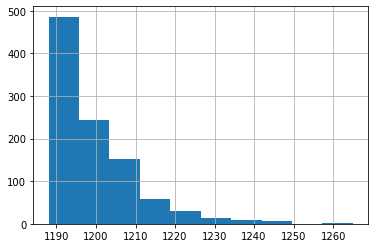

In [18]:
standings['total'].hist()

<AxesSubplot:>

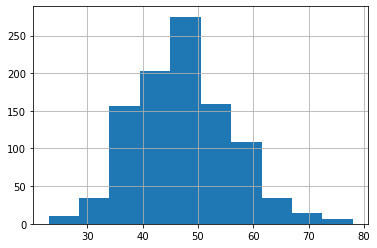

In [19]:
standings['event_total'].hist()

# This API give you detailed pickup for specific manager in specific gameweek
https://fantasy.premierleague.com/api/entry/[team-id]/event/[GW]/picks/

In [20]:
picks_for_top_1000_manager = pd.DataFrame()

In [21]:
gw_number = events['id'].iloc[events[events['is_current'] == True].index[0]]
i=1
for entry in standings['entry'].iloc[0:]:
    response_API = requests.get('https://fantasy.premierleague.com/api/entry/'+str(entry)+'/event/15/picks/')
    #print(response_API.status_code)
    data = response_API.text
    parse_json = json.loads(data)
    if picks_for_top_1000_manager.empty:
        picks_for_top_1000_manager = pd.DataFrame.from_dict(parse_json['picks'])
    else:
        picks_for_top_1000_manager = pd.concat([picks_for_top_1000_manager,pd.DataFrame.from_dict(parse_json['picks'])])
    print("Completed: {:.2f}%".format((i/1000)*100), end='\r')
    i+=1
picks_for_top_1000_manager.to_csv('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')
picks_for_top_1000_manager.shape

(15000, 5)

In [38]:
print('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')
picks_for_top_1000_manager= pd.read_csv('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')

GW19_picks_for_top_1000_manager.csv


In [23]:
picks_for_top_1000_manager['element'] = picks_for_top_1000_manager['element'].astype("category")
picks_for_top_1000_manager.describe(include='all')

,Unnamed: 0,element,position,multiplier,is_captain,is_vice_captain
count,15000.000000,15000.0,15000.000000,15000.000000,15000,15000
unique,NaN,240.0,NaN,NaN,2,2
top,NaN,308.0,NaN,NaN,False,False
freq,NaN,975.0,NaN,NaN,14000,14000
mean,7.000000,NaN,8.000000,0.801267,NaN,NaN
std,4.320638,NaN,4.320638,0.541656,NaN,NaN
min,0.000000,NaN,1.000000,0.000000,NaN,NaN
25%,3.000000,NaN,4.000000,0.000000,NaN,NaN
50%,7.000000,NaN,8.000000,1.000000,NaN,NaN
75%,11.000000,NaN,12.000000,1.000000,NaN,NaN


In [24]:
picks_for_top_100_manager = picks_for_top_1000_manager.head(1500)
picks_for_top_100_manager.describe(include = 'all')

,Unnamed: 0,element,position,multiplier,is_captain,is_vice_captain
count,1500.000000,1500.0,1500.000000,1500.000000,1500,1500
unique,NaN,135.0,NaN,NaN,2,2
top,NaN,308.0,NaN,NaN,False,False
freq,NaN,99.0,NaN,NaN,1400,1400
mean,7.000000,NaN,8.000000,0.802667,NaN,NaN
std,4.321935,NaN,4.321935,0.540297,NaN,NaN
min,0.000000,NaN,1.000000,0.000000,NaN,NaN
25%,3.000000,NaN,4.000000,0.000000,NaN,NaN
50%,7.000000,NaN,8.000000,1.000000,NaN,NaN
75%,11.000000,NaN,12.000000,1.000000,NaN,NaN


In [25]:
players_pick_count_for_top_1000_manager = picks_for_top_1000_manager['element'].value_counts().reset_index().rename(columns={'index':'player_id','element':'count'})
players_pick_count_for_top_1000_manager.describe()

,count
count,240.000000
mean,62.500000
std,147.061454
min,1.000000
25%,2.000000
50%,8.000000
75%,38.250000
max,975.000000


In [26]:
players_pick_count_for_top_100_manager = picks_for_top_100_manager['element'].value_counts().reset_index().rename(columns={'index':'player_id','element':'count'})
players_pick_count_for_top_100_manager = players_pick_count_for_top_100_manager[players_pick_count_for_top_100_manager['count']>0]
players_pick_count_for_top_100_manager.shape

(135, 2)

In [27]:
players_pick_count_for_top_1000_manager['percentage_over_1000'] = (players_pick_count_for_top_1000_manager['count']/1000)*100

In [28]:
players_pick_count_for_top_1000_manager.describe()

,count,percentage_over_1000
count,240.000000,240.000000
mean,62.500000,6.250000
std,147.061454,14.706145
min,1.000000,0.100000
25%,2.000000,0.200000
50%,8.000000,0.800000
75%,38.250000,3.825000
max,975.000000,97.500000


In [29]:
players_pick_count_for_top_100_manager['percentage_over_100'] = (players_pick_count_for_top_100_manager['count']/100)*100

In [30]:
players_pick_count_for_top_100_manager.describe()

,count,percentage_over_100
count,135.000000,135.000000
mean,11.111111,11.111111
std,18.065249,18.065249
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,11.000000,11.000000
max,99.000000,99.000000


In [31]:
players_pick_count_for_top_1000_manager.head(20)

,player_id,count,percentage_over_1000
0,308,975,97.5
1,355,835,83.5
2,516,696,69.6
3,311,694,69.4
4,524,693,69.3
5,108,644,64.4
6,60,625,62.5
7,19,567,56.7
8,430,460,46.0
9,412,435,43.5


In [32]:
players_pick_count_for_top_1000_manager = players_pick_count_for_top_1000_manager.set_index('player_id')

In [33]:
players_pick_count_for_top_1000_manager.index

CategoricalIndex([308, 355, 516, 311, 524, 108,  60,  19, 430, 412,
                  ...
                  466, 467, 199, 321, 479, 495, 186, 167, 166, 471],
                 categories=[5, 6, 8, 12, 13, 14, 17, 19, ...], ordered=False, dtype='category', name='player_id', length=240)

In [34]:
players_pick_count_for_top_100_manager = players_pick_count_for_top_100_manager.set_index('player_id')

In [35]:
players_pick_count_for_top_100_manager.index

CategoricalIndex([308, 355, 516, 108, 311, 524,  60,  19, 362, 430,
                  ...
                  225,  25, 468, 382, 616, 109, 122, 604, 291, 211],
                 categories=[5, 6, 8, 12, 13, 14, 17, 19, ...], ordered=False, dtype='category', name='player_id', length=135)

In [36]:
top=[]
for player_id in players_pick_count_for_top_1000_manager.index:
    top.append({'id':player_id, 'name':elements.loc[player_id]['web_name'],'element_type':elements.loc[player_id]['element_type'], 'top_1000_owned_percentage':players_pick_count_for_top_1000_manager.loc[player_id]['percentage_over_1000'],'overall_owned_percentage':elements.loc[player_id]['selected_by_percent']})
top

[{'id': 308,
  'name': 'Salah',
  'element_type': 3,
  'top_1000_owned_percentage': 97.5,
  'overall_owned_percentage': '55.4'},
 {'id': 355,
  'name': 'Haaland',
  'element_type': 4,
  'top_1000_owned_percentage': 83.5,
  'overall_owned_percentage': '54.9'},
 {'id': 516,
  'name': 'Son',
  'element_type': 3,
  'top_1000_owned_percentage': 69.6,
  'overall_owned_percentage': '45.0'},
 {'id': 311,
  'name': 'Tsimikas',
  'element_type': 2,
  'top_1000_owned_percentage': 69.39999999999999,
  'overall_owned_percentage': '4.7'},
 {'id': 524,
  'name': 'Areola',
  'element_type': 1,
  'top_1000_owned_percentage': 69.3,
  'overall_owned_percentage': '33.3'},
 {'id': 108,
  'name': 'Mbeumo',
  'element_type': 3,
  'top_1000_owned_percentage': 64.4,
  'overall_owned_percentage': '7.5'},
 {'id': 60,
  'name': 'Watkins',
  'element_type': 4,
  'top_1000_owned_percentage': 62.5,
  'overall_owned_percentage': '52.8'},
 {'id': 19,
  'name': 'Saka',
  'element_type': 3,
  'top_1000_owned_percentage'

In [39]:
top_owned_players_for_top_1000_manager = pd.DataFrame.from_dict(top)
top_owned_players_for_top_1000_manager.head(15)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
0,308,Salah,3,97.5,55.4
1,355,Haaland,4,83.5,54.9
2,516,Son,3,69.6,45.0
3,311,Tsimikas,2,69.4,4.7
4,524,Areola,1,69.3,33.3
5,108,Mbeumo,3,64.4,7.5
6,60,Watkins,4,62.5,52.8
7,19,Saka,3,56.7,57.6
8,430,Trippier,2,46.0,40.4
9,412,Gordon,3,43.5,21.1


In [40]:
top=[]
for player_id in players_pick_count_for_top_100_manager.index:
    top.append({'id':player_id, 'name':elements.loc[player_id]['web_name'],'element_type':elements.loc[player_id]['element_type'], 'top_100_owned_percentage':players_pick_count_for_top_100_manager.loc[player_id]['percentage_over_100'],'overall_owned_percentage':elements.loc[player_id]['selected_by_percent']})
top

[{'id': 308,
  'name': 'Salah',
  'element_type': 3,
  'top_100_owned_percentage': 99.0,
  'overall_owned_percentage': '55.4'},
 {'id': 355,
  'name': 'Haaland',
  'element_type': 4,
  'top_100_owned_percentage': 81.0,
  'overall_owned_percentage': '54.9'},
 {'id': 516,
  'name': 'Son',
  'element_type': 3,
  'top_100_owned_percentage': 74.0,
  'overall_owned_percentage': '45.0'},
 {'id': 108,
  'name': 'Mbeumo',
  'element_type': 3,
  'top_100_owned_percentage': 69.0,
  'overall_owned_percentage': '7.5'},
 {'id': 311,
  'name': 'Tsimikas',
  'element_type': 2,
  'top_100_owned_percentage': 65.0,
  'overall_owned_percentage': '4.7'},
 {'id': 524,
  'name': 'Areola',
  'element_type': 1,
  'top_100_owned_percentage': 63.0,
  'overall_owned_percentage': '33.3'},
 {'id': 60,
  'name': 'Watkins',
  'element_type': 4,
  'top_100_owned_percentage': 60.0,
  'overall_owned_percentage': '52.8'},
 {'id': 19,
  'name': 'Saka',
  'element_type': 3,
  'top_100_owned_percentage': 47.0,
  'overall_ow

In [41]:
top_owned_players_for_top_100_manager = pd.DataFrame.from_dict(top)
top_owned_players_for_top_100_manager.head(15)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
0,308,Salah,3,99.0,55.4
1,355,Haaland,4,81.0,54.9
2,516,Son,3,74.0,45.0
3,108,Mbeumo,3,69.0,7.5
4,311,Tsimikas,2,65.0,4.7
5,524,Areola,1,63.0,33.3
6,60,Watkins,4,60.0,52.8
7,19,Saka,3,47.0,57.6
8,362,Palmer,3,43.0,21.3
9,430,Trippier,2,42.0,40.4


In [42]:
top_owned_GK_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==1]
top_owned_GK_for_top_1000_manager.shape

(35, 5)

In [43]:
top_owned_GK_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==1]
top_owned_GK_for_top_100_manager.shape

(20, 5)

In [45]:
top_owned_GK_for_top_1000_manager

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
4,524,Areola,1,69.3,33.3
16,28,Turner,1,26.3,12.4
17,409,Dubravka,1,24.6,8.2
28,275,Leno,1,12.8,16.8
35,230,Johnstone,1,10.2,2.9
38,301,Kelleher,1,9.4,1.3
39,145,Sanchez,1,9.1,4.3
43,263,Pickford,1,8.0,9.4
49,113,Raya,1,5.7,6.0
50,597,Onana,1,5.6,14.5


In [46]:
top_owned_GK_for_top_100_manager

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
5,524,Areola,1,63.0,33.3
17,28,Turner,1,27.0,12.4
24,301,Kelleher,1,18.0,1.3
26,409,Dubravka,1,17.0,8.2
29,275,Leno,1,15.0,16.8
31,263,Pickford,1,13.0,9.4
34,597,Onana,1,11.0,14.5
38,230,Johnstone,1,8.0,2.9
39,145,Sanchez,1,8.0,4.3
59,101,Flekken,1,4.0,2.8


In [47]:
top_owned_DF_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==2]
top_owned_DF_for_top_1000_manager.shape

(99, 5)

In [48]:
top_owned_DF_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==2]
top_owned_DF_for_top_100_manager.shape

(51, 5)

In [49]:
top_owned_DF_for_top_1000_manager.head(20)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
3,311,Tsimikas,2,69.4,4.7
8,430,Trippier,2,46.0,40.4
11,20,Saliba,2,36.6,36.5
14,506,Pedro Porro,2,32.4,26.6
15,5,Gabriel,2,31.4,17.3
19,290,Alexander-Arnold,2,24.0,24.7
21,419,Lascelles,2,22.1,6.4
22,36,Cash,2,21.9,18.4
23,178,Taylor,2,19.8,5.6
24,31,Zinchenko,2,19.4,13.7


In [50]:
top_owned_DF_for_top_100_manager.head(20)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
4,311,Tsimikas,2,65.0,4.7
9,430,Trippier,2,42.0,40.4
10,20,Saliba,2,40.0,36.5
12,506,Pedro Porro,2,39.0,26.6
15,290,Alexander-Arnold,2,30.0,24.7
16,5,Gabriel,2,30.0,17.3
18,419,Lascelles,2,23.0,6.4
20,36,Cash,2,22.0,18.4
21,31,Zinchenko,2,22.0,13.7
25,473,Baldock,2,18.0,6.5


In [51]:
top_owned_MID_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==3]
top_owned_MID_for_top_1000_manager.shape

(67, 5)

In [52]:
top_owned_MID_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==3]
top_owned_MID_for_top_100_manager.shape

(41, 5)

In [53]:
top_owned_MID_for_top_1000_manager.head(20)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
0,308,Salah,3,97.5,55.4
2,516,Son,3,69.6,45.0
5,108,Mbeumo,3,64.4,7.5
7,19,Saka,3,56.7,57.6
9,412,Gordon,3,43.5,21.1
10,362,Palmer,3,38.9,21.3
18,557,Hee Chan,3,24.3,11.2
20,526,Bowen,3,22.5,25.9
25,689,Kudus,3,16.0,8.0
37,599,Diaby,3,9.9,9.1


In [55]:
top_owned_MID_for_top_100_manager.head(41)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
0,308,Salah,3,99.0,55.4
2,516,Son,3,74.0,45.0
3,108,Mbeumo,3,69.0,7.5
7,19,Saka,3,47.0,57.6
8,362,Palmer,3,43.0,21.3
11,412,Gordon,3,40.0,21.1
22,526,Bowen,3,20.0,25.9
23,557,Hee Chan,3,19.0,11.2
27,689,Kudus,3,16.0,8.0
44,12,Martinelli,3,7.0,5.6


In [56]:
top_owned_FWD_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==4]
top_owned_FWD_for_top_1000_manager.shape

(39, 5)

In [57]:
top_owned_FWD_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==4]
top_owned_FWD_for_top_100_manager.shape

(23, 5)

In [58]:
top_owned_FWD_for_top_1000_manager.head(20)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
1,355,Haaland,4,83.5,54.9
6,60,Watkins,4,62.5,52.8
12,33,Archer,4,34.4,8.6
13,343,J.Alvarez,4,32.5,32.8
26,293,Darwin,4,15.5,13.5
27,85,Solanke,4,15.0,27.2
30,538,Mubama,4,11.3,5.6
44,590,Cunha,4,6.7,6.3
48,415,Isak,4,5.8,14.3
52,135,João Pedro,4,4.5,10.5


In [59]:
top_owned_FWD_for_top_100_manager.head(20)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
1,355,Haaland,4,81.0,54.9
6,60,Watkins,4,60.0,52.8
13,343,J.Alvarez,4,35.0,32.8
14,33,Archer,4,33.0,8.6
19,85,Solanke,4,23.0,27.2
32,293,Darwin,4,12.0,13.5
37,538,Mubama,4,9.0,5.6
40,590,Cunha,4,8.0,6.3
43,135,João Pedro,4,7.0,10.5
53,82,Semenyo,4,5.0,3.3
